<a href="https://colab.research.google.com/github/MiguelAngel-ht/Image_Processing_/blob/main/CODE_6_Histogram_Matching_y_CLAHE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot  as plt 

In [ ]:
!pip install hdf5storage # TO READ .mat 

In [ ]:
# READING AND SAVING .MAT FILE

import hdf5storage

mat = hdf5storage.loadmat('HistLuna.mat')
h2_Luna = []

for k, v in mat.items():
    h2_Luna.append(np.array(v))
    
h2_Luna = h2_Luna[3][0]

In [ ]:
def plot_img(img, title='Image'): # TO PLOT AND SAVE IMAGES
  plt.imshow(img, 'gray')
  plt.title(title)
  cv.imwrite(title+'.png', img)
  plt.show()

In [ ]:
# PLOT AND SAVE HISTOGRAMS

def plot_his(hist, title='Histogram'):
  
  plt.figure(figsize=(8,4))
  plt.title(title)
  plt.xlabel("Intensidad")
  plt.ylabel("Número de Pixeles")

  markerline, stemlines, baseline = plt.stem(
    hist, linefmt ='orange', markerfmt ='',
    bottom = 0, use_line_collection = True)
  
  plt.savefig(title+'.png')
  plt.show()

In [ ]:
# CALCULATE HISTOGRAMS OF A IMAGES

def histograms(img):
  
  # h -- histogram   |   H -- Cumulative Histogram 
  h = np.histogram(img.flatten(), 256)[0]
  h = h / h.max()

  H = h.cumsum()
  H = H / H.max()

  return h, H

In [ ]:
# EQUALIZATION OF IMAGES

def histeq(img, hist):
  cdf_m = np.ma.masked_equal(hist, 0)
  cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
  cdf = np.ma.filled(cdf_m, 0).astype('uint8')
  Ieq = cdf[img]
  return Ieq

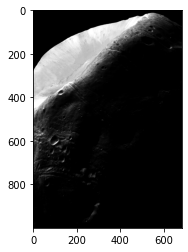

In [ ]:
# READING IMAGE TO PROCESSING
img = cv.imread('/content/Fig0310(a).tif',0)
plt.imshow(img, 'gray')
cv.imwrite('original.png', img)
plt.show()

In [ ]:
# FUNCTION THAT CREATE A IMAGE I2 CHANGING INTENSITIES FOLLOWING A 
# HISTOGRAM h2 AND MATCHING WITH HISTOGRAM OF THE ORIGINAL Im1 TO 
# CREATE ANOTHER WITH SIMILAR HISTOGRAM I2

def Hisma(Im1, h2):
  np.place(h2, h2==0, 1 / Im1.max()) # cambiando ceros a 1/pixeles
  
  h1 = np.histogram(img.flatten(), 256)[0]
  h1 = h1 / h1.max()
  H1 = h1.cumsum()
  H1 = H1 / H1.max()
  H2 = h2.cumsum()
  
  x = np.linspace(0.0, 255.0, 256)
  Ieq = H1[Im1]

  y = np.linspace(min(H2), 1.0, 256)
  inv_H2 = np.interp(y, H2, y)
  inv_H2 = inv_H2 / inv_H2.max()


  Ieq = ((Ieq - Ieq.min()) * (1/(Ieq.max() - Ieq.min()) * 255)).astype('uint8')
  I2 = inv_H2[Ieq]

  I2 = ((I2 - I2.min()) * (1/(I2.max() - I2.min()) * 255)).astype('uint8')

  return I2, inv_H2, H2

In [ ]:
# TESTING HISTOGRAM MATCHING FUCTION 
I2, inv_H2, H2 = Hisma(img, h2_Luna)

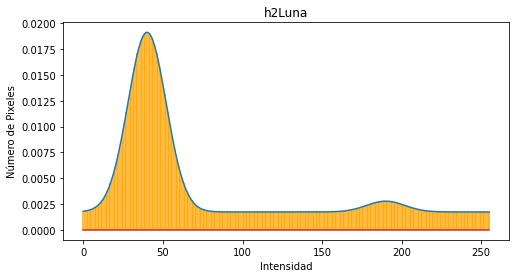

In [ ]:
plot_his(h2_Luna, 'h2Luna')

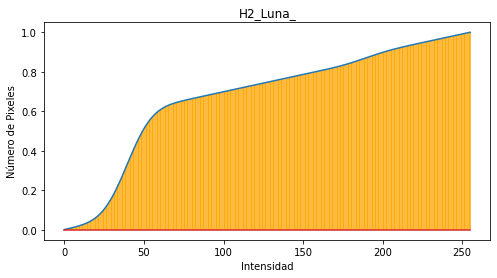

In [ ]:
plot_his(h2_Luna.cumsum(),'H2_Luna_')

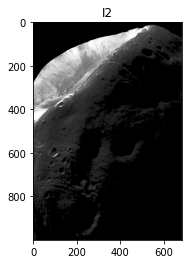

In [ ]:
plot_img(I2, 'I2')

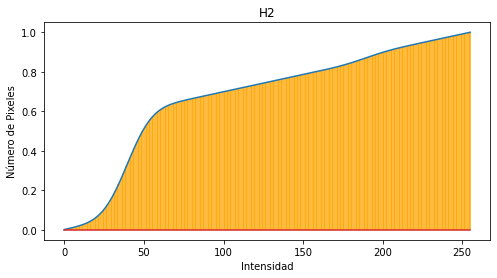

In [ ]:
plot_his(H2, 'H2')

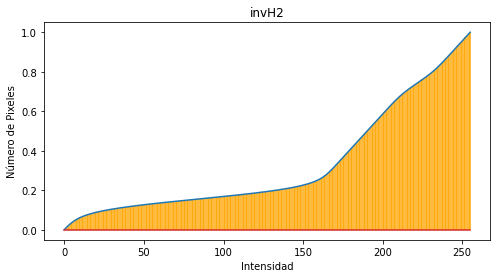

In [ ]:
plot_his(inv_H2, 'invH2')

In [ ]:
h2, H2_null = histograms(I2)

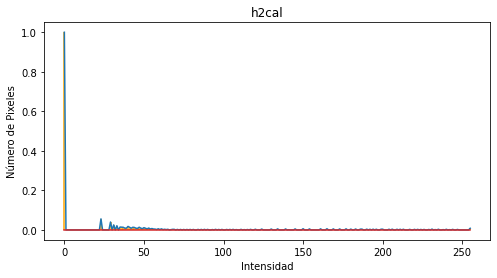

In [ ]:
plot_his(h2,'h2cal')

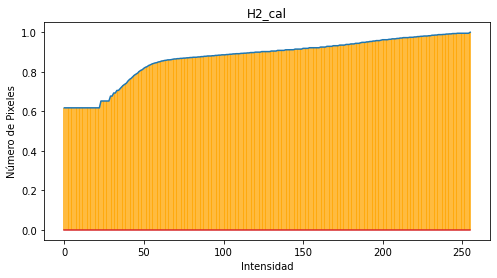

In [ ]:
plot_his(H2_null,'H2_cal')

In [ ]:
# DIRECT FUNCTION OF OPENCV
img_py = histeq(cv.equalizeHist(img),inv_H2)

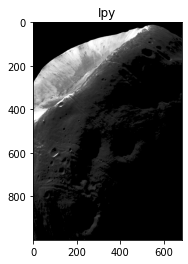

In [ ]:
plot_img(img_py, 'Ipy')

In [ ]:
hpy, Hpy = histograms(img_py)

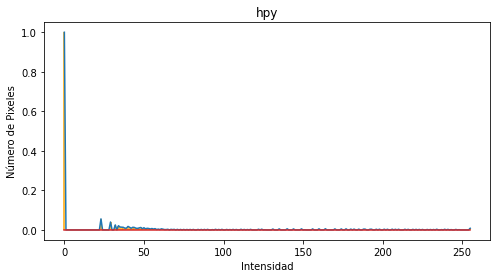

In [ ]:
plot_his(hpy, 'hpy')

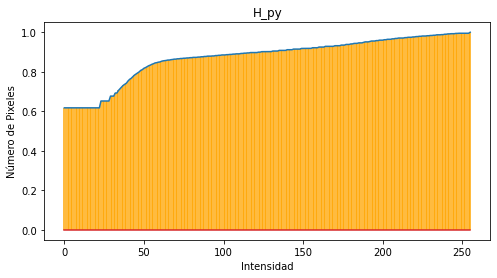

In [ ]:
plot_his(Hpy, 'H_py')

In [ ]:
clahe = cv.createCLAHE(clipLimit=2.55, tileGridSize=[8,8]) #default values in matlab
# https://la.mathworks.com/help/images/ref/adapthisteq.html#bvhf1xx-3
g1 = clahe.apply(img)
clahe = cv.createCLAHE(clipLimit=2.55, tileGridSize=(25, 25))
g2 = clahe.apply(img)
clahe = cv.createCLAHE(clipLimit=12.75, tileGridSize=(25, 25))
g3 = clahe.apply(img)

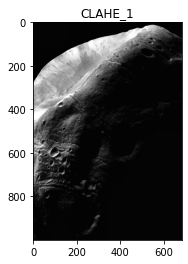

In [ ]:
plot_img(g1,'CLAHE_1')

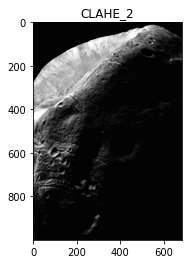

In [ ]:
plot_img(g2,'CLAHE_2')

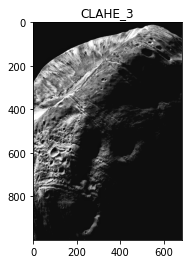

In [ ]:
plot_img(g3,'CLAHE_3')